##### Lending Club Case Study

'loan.csv' file contains details requried for the case study

Problem Statement : <br> 
Anaylise applicants data find the defaulters that is to identify the risky loan applicants who are not cable of paying back the loan.Then such loans can be reduced thereby cutting down the amount of credit loss.

import libraries <br>
missingno library is added to understand the missing data within pandas dataframe

In [235]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Analysing the data

In [236]:
#load csv file
loan = pd.read_csv('loan.csv')

/var/folders/qs/kld1f2591l72g1wjm4ghlnpw0000gn/T/ipykernel_32400/925936626.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


### Display loan details

In [237]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Get all columns

In [238]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Clean Up
To analise any data first step would be cleaning up the data <br>
#### Display all columns whose values is null with missingno

<Axes: >

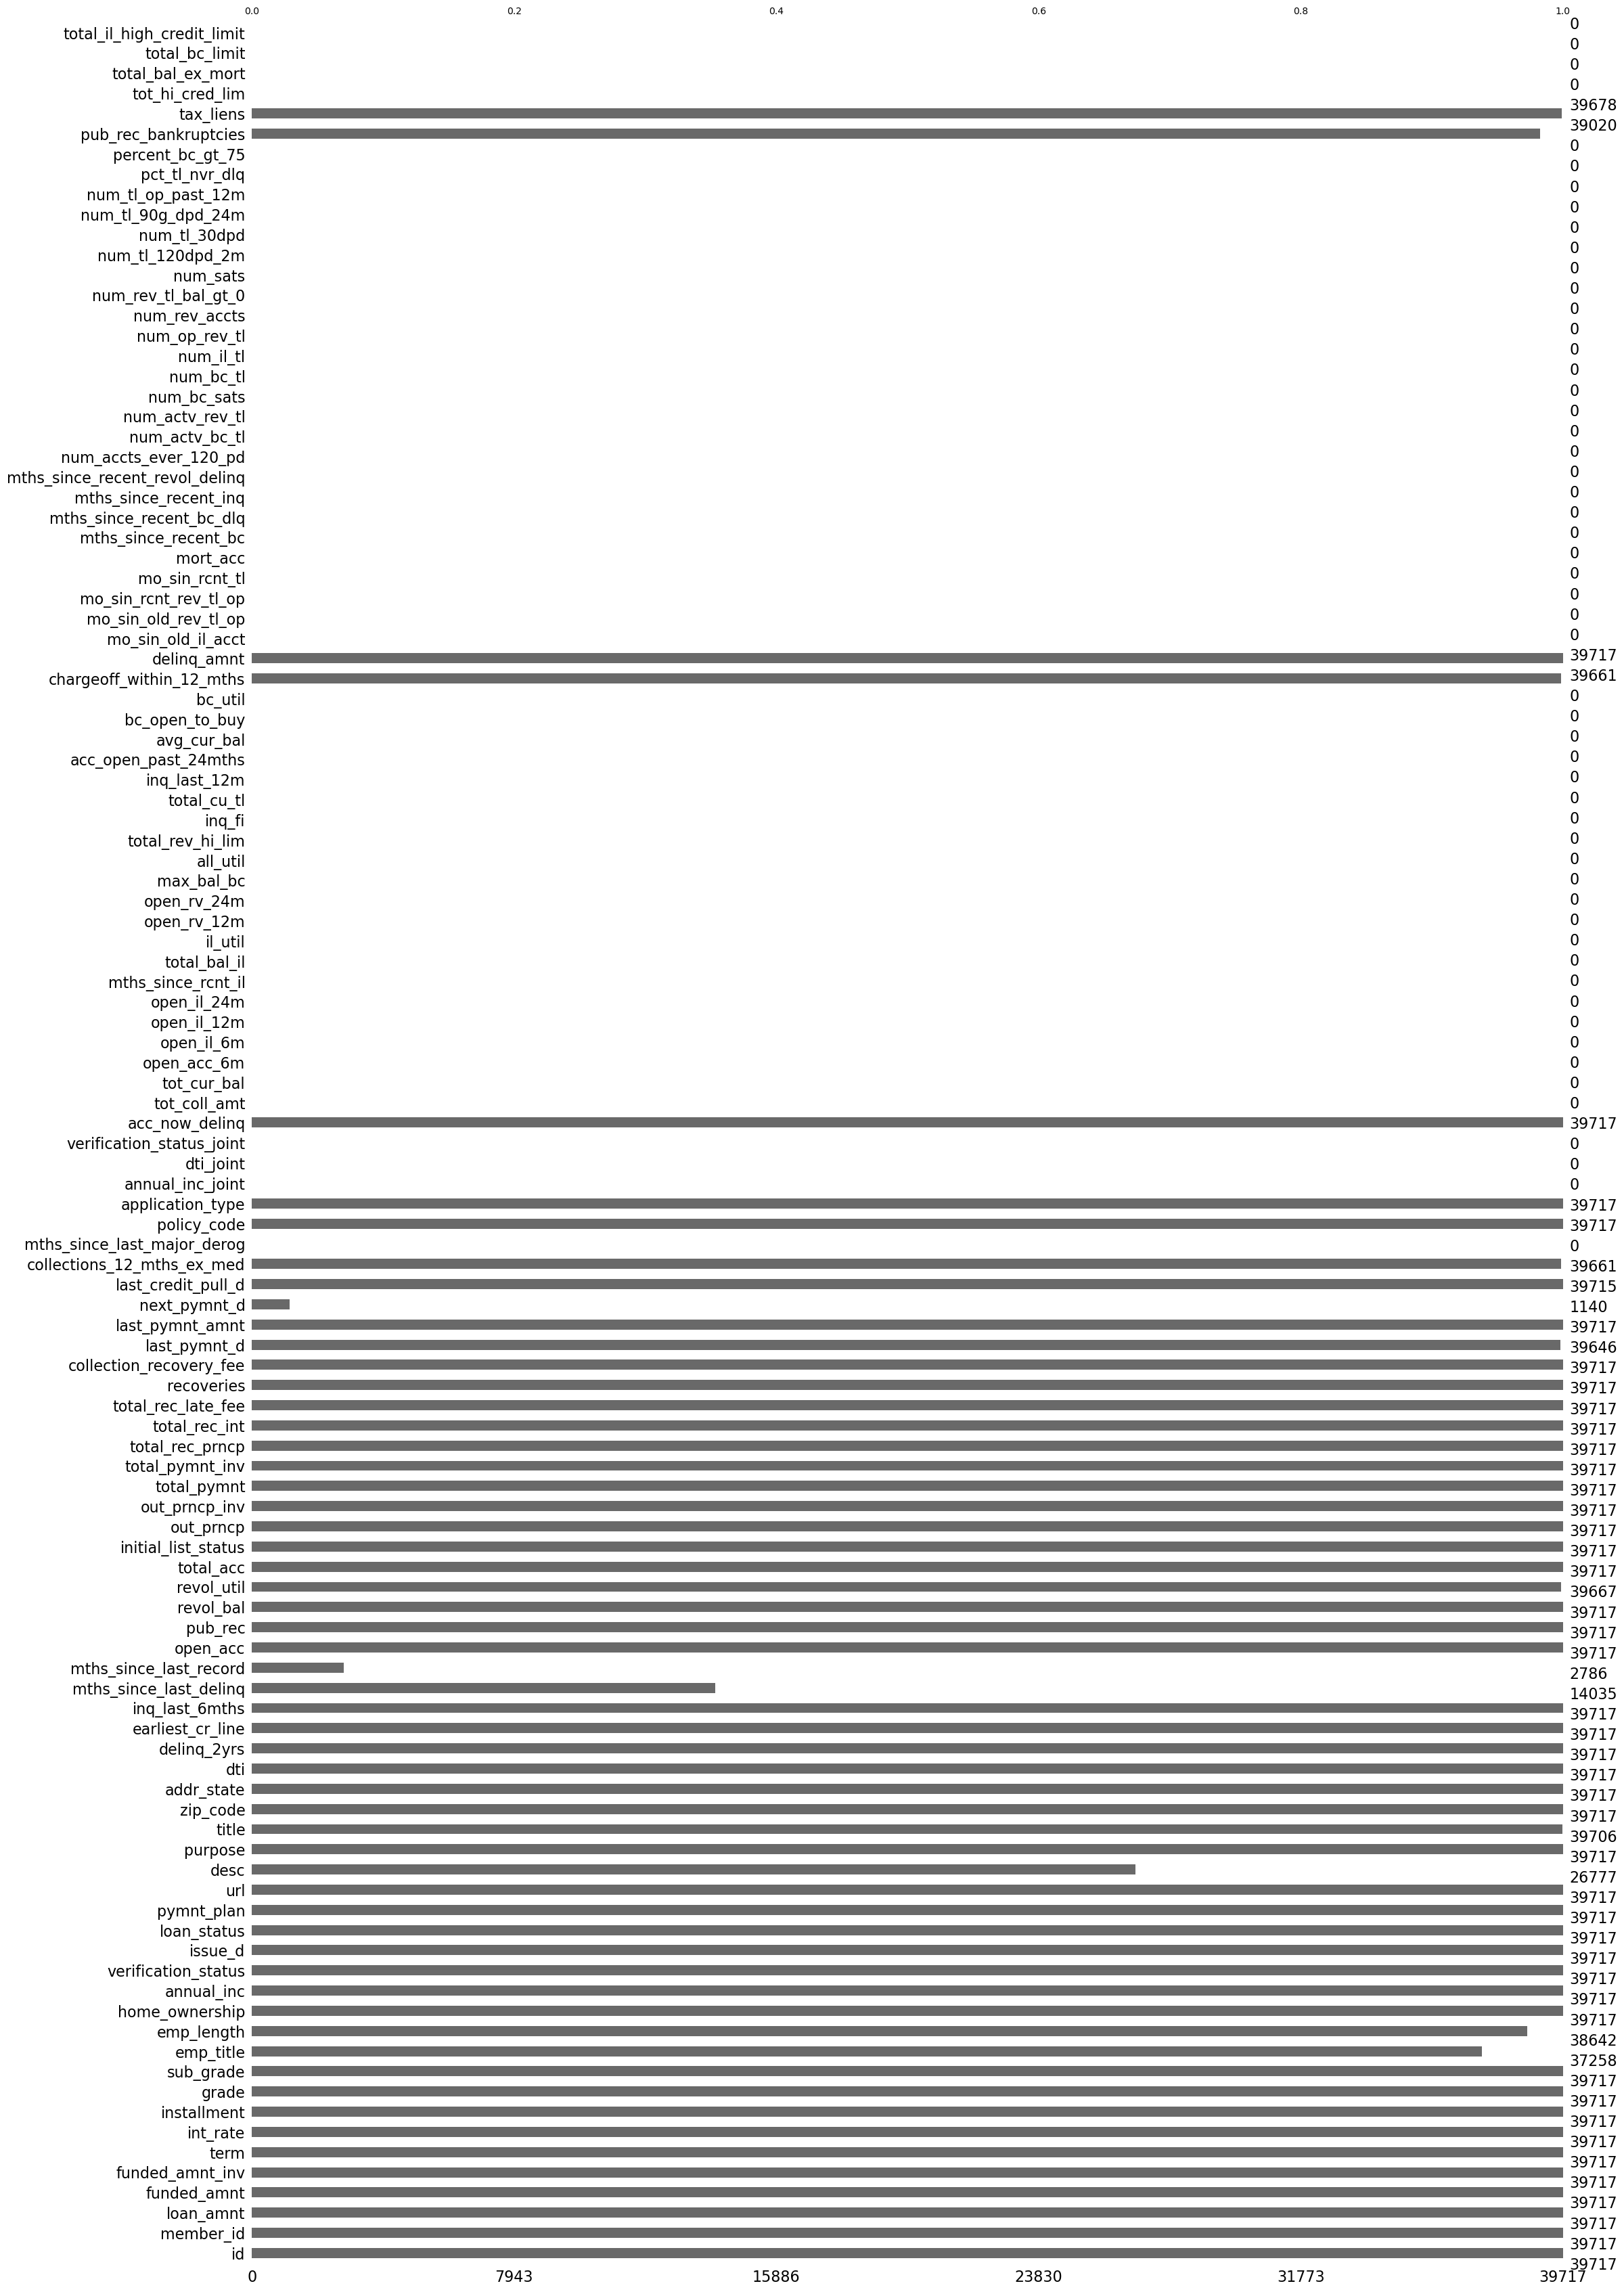

In [239]:
msno.bar(loan)

#### Get number of columns with all rows null 

In [240]:
loan.columns[loan.isnull().all()].size

54

#### Drop all the columns with all null values. Currently this data set has 54 coulmns with all rows are missing

In [241]:
#Dropping columns with all rows null
loan= loan.dropna(axis = 1,how = 'all')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Display the loan details with missingo Graph to check if there is any null value left

<Axes: >

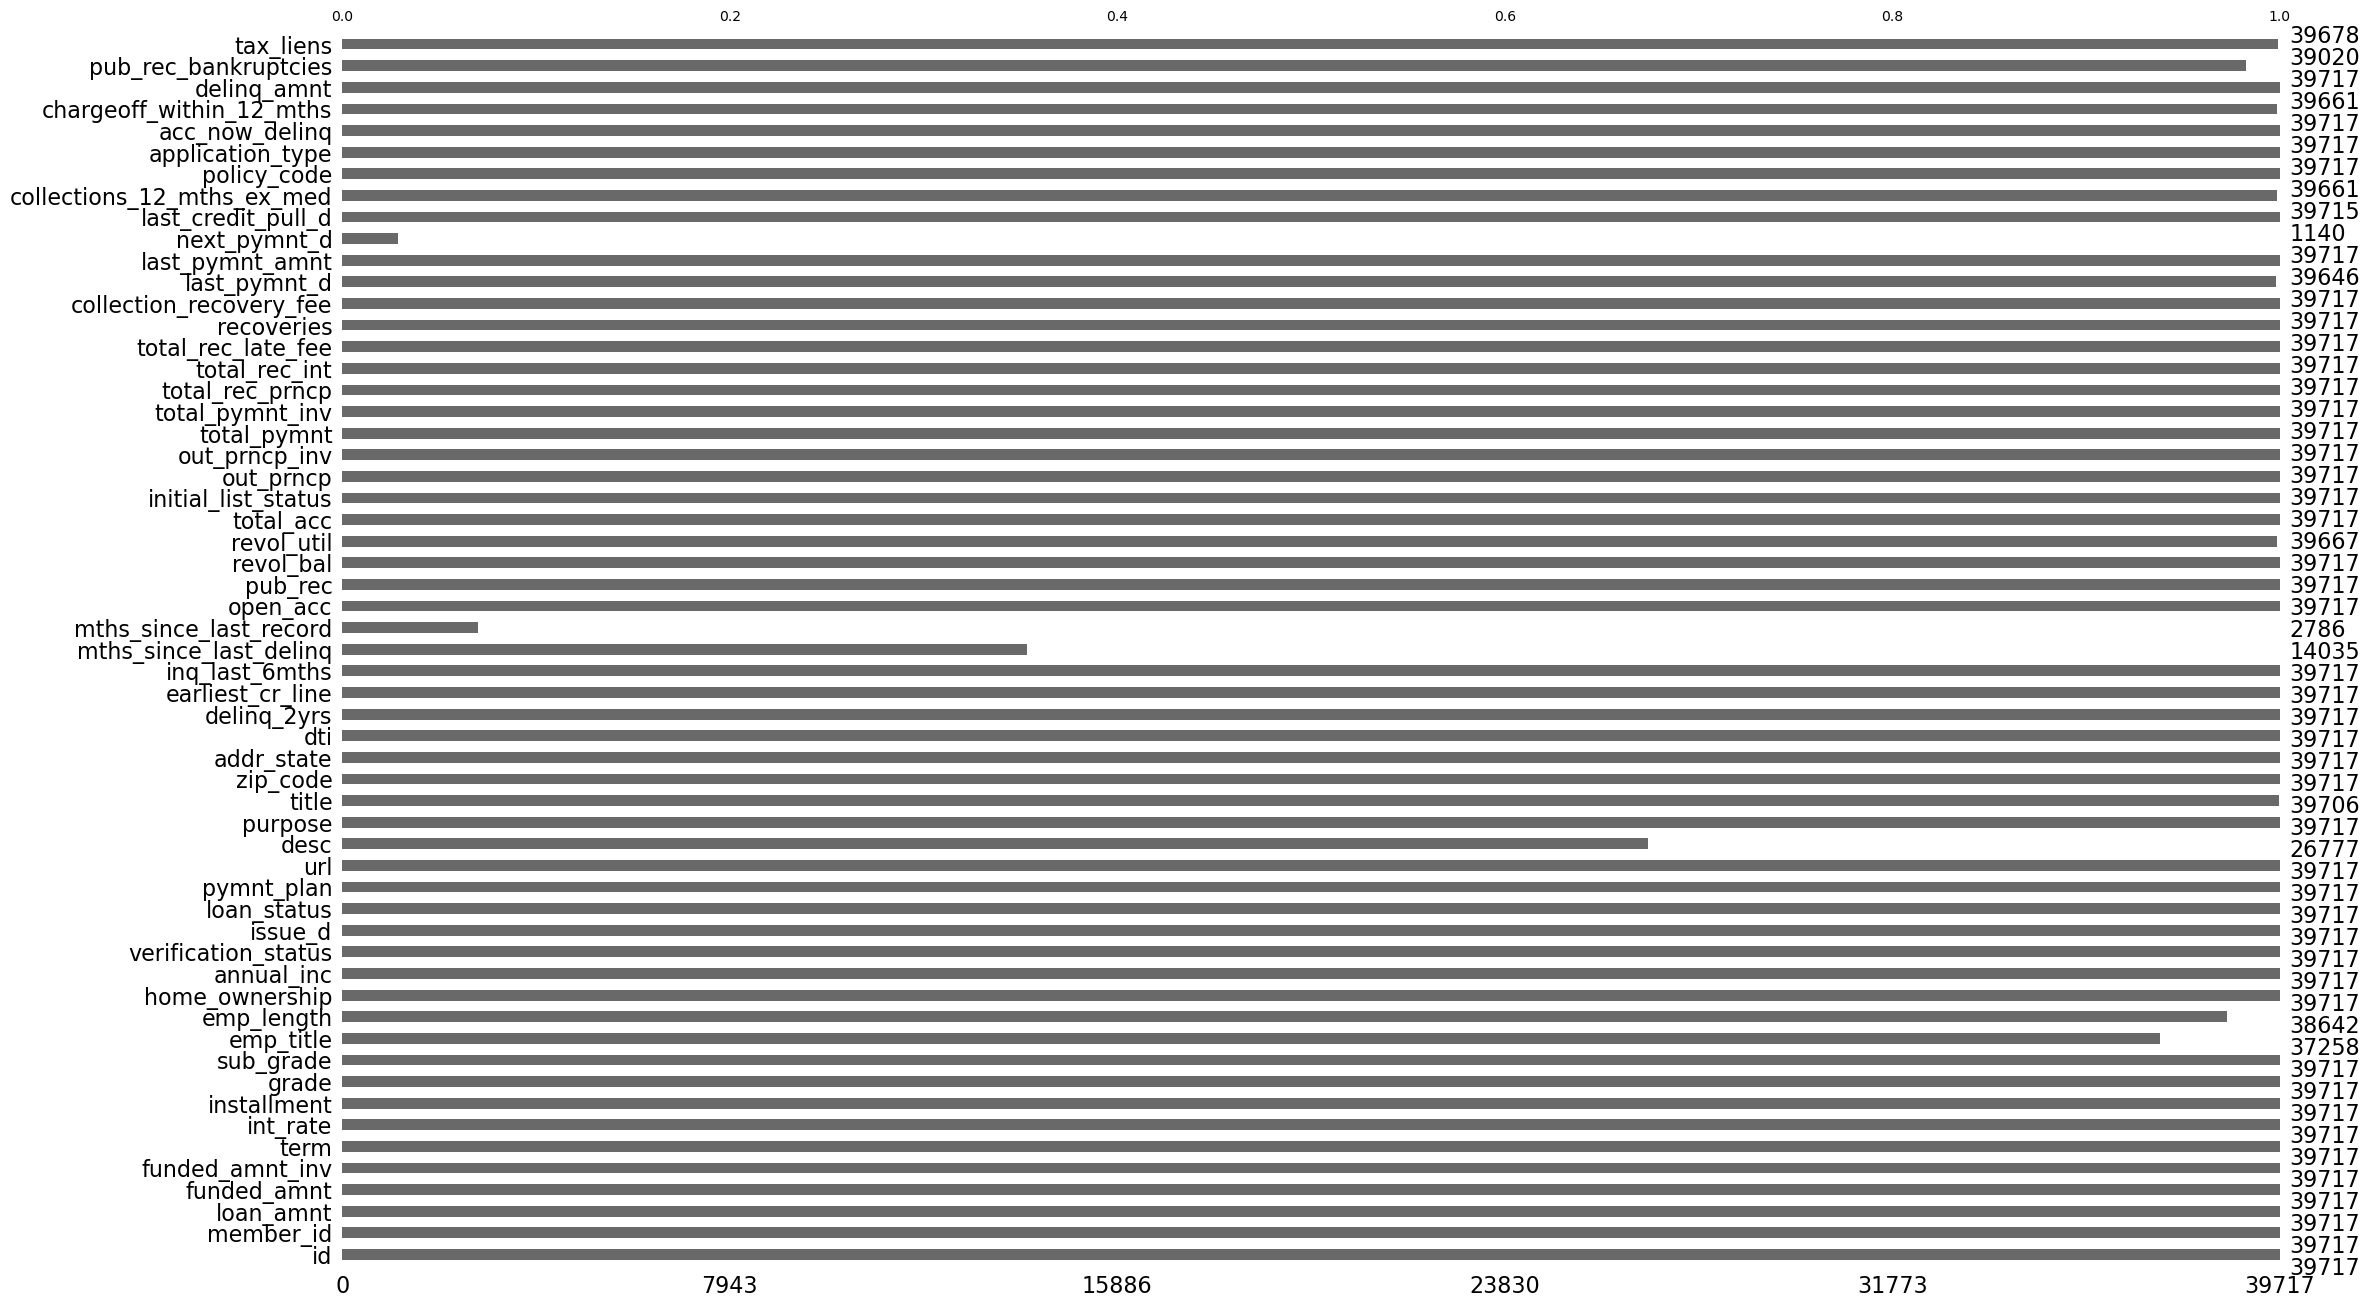

In [242]:
msno.bar(loan)

#### Removing all the columns whose null/NAN is more than 80%<br> from above bar graph next_pymnt_d and mths_since_last_record is having more than 80% of missing data so removing these 2 columns

<Axes: >

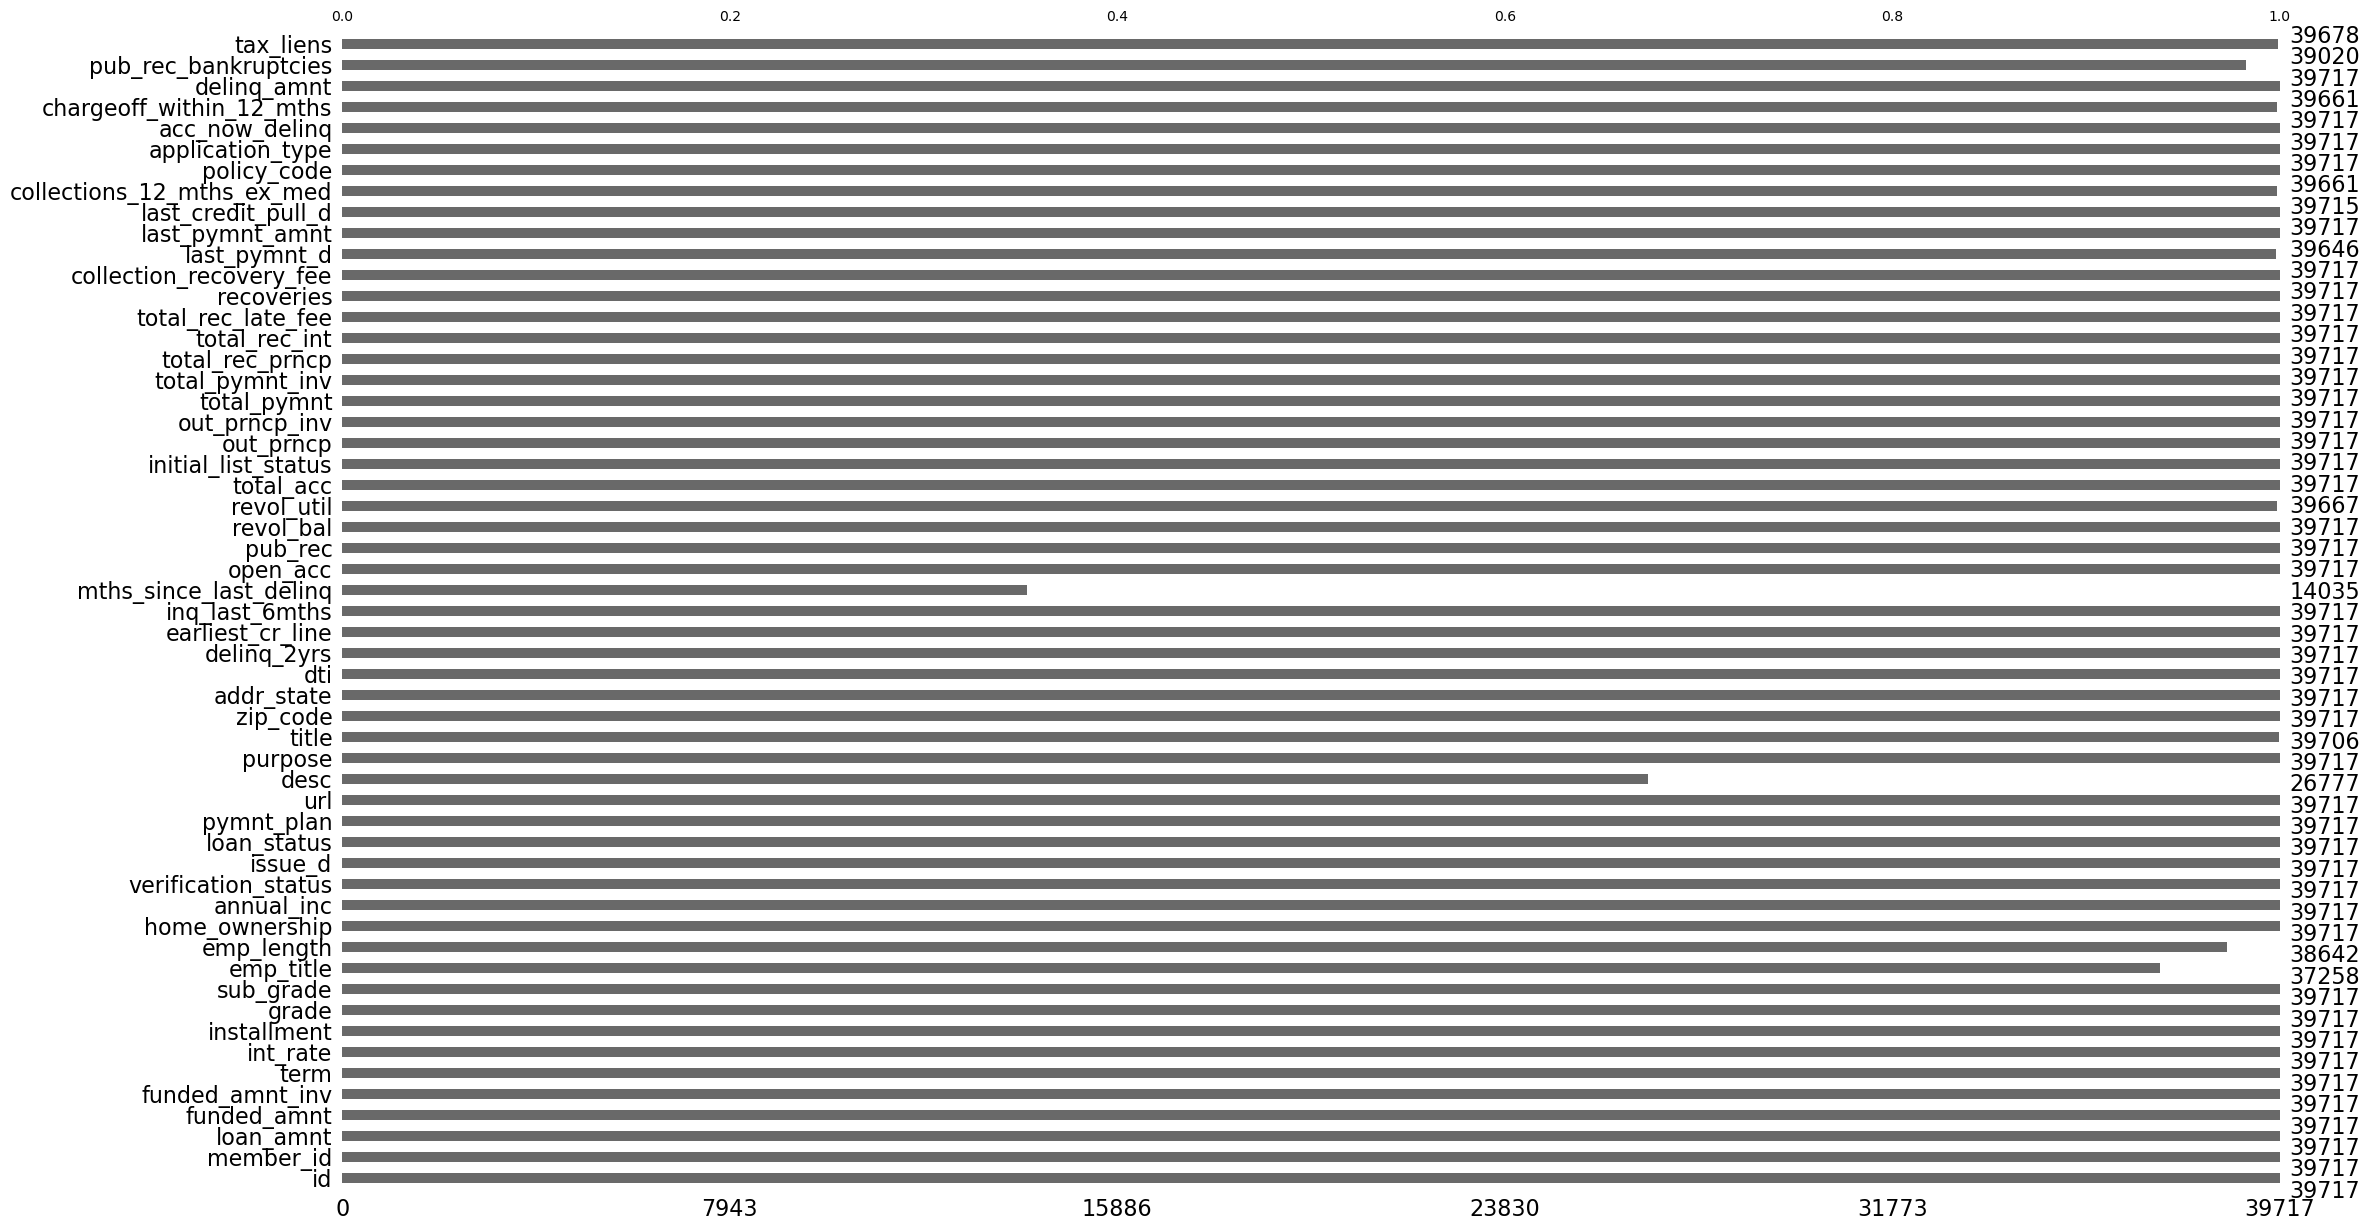

In [243]:
loan=loan.drop(axis='columns',columns='next_pymnt_d', errors='ignore')
loan=loan.drop(axis='columns',columns='mths_since_last_record', errors='ignore')
msno.bar(loan)


In [244]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [245]:
#### check for all the columns with unique values


In [246]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [247]:
#### remove all the columns whose unique value count is 1

In [248]:
loan = loan.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis=1)

In [249]:
# check again for unique count 
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal 

#### Remove all Customer Behavior variable as these are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.

In [250]:
#Added all the customer behavior variables to a list
cust_behav_variables=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [251]:
# drop all customer behavior variable
loan = loan.drop(cust_behav_variables,axis=1, errors='ignore')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_title               37258 non-null  object 
 11  emp_length              38642 non-null  object 
 12  home_ownership          39717 non-null  object 
 13  annual_inc              39717 non-null  float64
 14  verification_status     39717 non-null

In [252]:
remove_columns = ['id','member_id','installment','emp_title','url','desc','title','addr_state','mths_since_last_delinq','next_pymnt_d','zip_code']

#### Cleaning up Data which is not needed for the analysis
##### id,member_id : Since the id is unique to each applicant which is not needed for the analysis
##### installment : The installment amount is not needed for the current loan applicants
##### emp_title : The title of the employee keeps changing doesn't contribute to the analysis
##### mths_since_last_record, url,desc,title,addr_state,mths_since_last_delinq,next_pymnt_d,zip_code : geo details are not required for the analysis


In [253]:
#list all the coulmns that can be removed as mentioned above
irr_columns = ['id','member_id','installment','emp_title','url','desc','title','addr_state','mths_since_last_delinq','zip_code']

In [254]:
loan = loan.drop(irr_columns,axis=1,errors='ignore')

In [255]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  dti                   39717 non-null  float64
 15  pub_rec_bankruptcie

### Data Analysis <br> Check on the data type of all the columns. Remove unwanted data and convert the column to the right datatype

In [256]:
print(loan['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [257]:
# remove all the rows whose loan status is "current" as the current loan holders details will not determine whether that applicant
#fully pay the loan or charged-off
loan = loan[~(loan['loan_status']=='Current')]

In [258]:
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0.0
6,7000,7000,7000.0,60 months,15.96%,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,0.0
7,3000,3000,3000.0,36 months,18.64%,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35,0.0
8,5600,5600,5600.0,60 months,21.28%,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55,0.0
9,5375,5375,5350.0,60 months,12.69%,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08,0.0
10,6500,6500,6500.0,60 months,14.65%,C,C3,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,16.12,0.0


In [259]:
print(loan['term'].unique())

[' 36 months' ' 60 months']


In [260]:
# remove "months" from term column and convert the data to integer type
loan['term'] = loan['term'].apply(lambda term:term if isinstance(term,int) else int(term.replace(' months','')))
print(loan['term'].unique())
print(loan['term'].dtype)

[36 60]
int64


In [261]:
# remove "%" from int_rate
loan['int_rate'] = loan['int_rate'].apply(lambda rate:rate if isinstance(rate,float) else float(rate.replace('%','')))
print(loan['int_rate'])

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64


#### Clean up emp_legth  data as it contans <,>,+, years. Convert the data to approximate years by removing these symbols.


In [262]:
def cleanEmploymentLength(x):
  years = 'years'
  year = 'year'
  lessthan = '<'
  notapp = 'n/a'
  plus = '+'
  if years in x:
    x = x.replace(years,'')
  if year in x:
    x = x.replace(year,'')
  if lessthan in x:
    x = x.replace(lessthan,'')
  if notapp in x:
    x = x.replace(notapp,'0')
  if plus in x:
    x = x.replace(plus,'')
  return int(x.strip())
loan['emp_length'] = loan['emp_length'].fillna('n/a')
loan['emp_length'] = loan['emp_length'].apply(cleanEmploymentLength)

In [263]:
# Extract Month from loan  issued date and add it to separate column

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['issue_month']=loan['issue_d'].dt.month

In [264]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   sub_grade             38577 non-null  object        
 7   emp_length            38577 non-null  int64         
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose         

In [265]:
loan.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_month
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0.0,12
1,2500,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0.0,12


#### Analyse the columns

In [266]:
# Check the % of loan status
((loan['loan_status'].value_counts())/len(loan))*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [267]:
# Check % of home ownership
((loan['home_ownership'].value_counts())/len(loan))*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [268]:
# Check on the purpose
((loan['purpose'].value_counts())/len(loan))*100

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [269]:
#Checking on the Verification status
((loan['verification_status'].value_counts())/len(loan))*100

Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64

In [270]:
# Checking on the grade
((loan['grade'].value_counts())/len(loan))*100

B    30.264147
A    26.038831
C    20.307437
D    13.181429
E     6.903077
F     2.530005
G     0.775073
Name: grade, dtype: float64

In [271]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_month
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,4.925526,6.877797e+04,13.272727,0.043479,7.114757
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,3.453921,6.421868e+04,6.673044,0.204583,3.408523
min,500.000000,500.000000,0.000000,36.000000,5.420000,0.000000,4.000000e+03,0.000000,0.000000,1.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,2.000000,4.000000e+04,8.130000,0.000000,4.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,4.000000,5.886800e+04,13.370000,0.000000,7.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,9.000000,8.200000e+04,18.560000,0.000000,10.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,10.000000,6.000000e+06,29.990000,2.000000,12.000000


#### Identify the variables
Numeric Variables : loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_month
<br>Categorial Variables: grade, sub_grade,home_ownership,verification_status,loan_status,purpose

### UniVariate

#### Count plot to show fully paid vs charged off loan

<Axes: xlabel='loan_status', ylabel='count'>

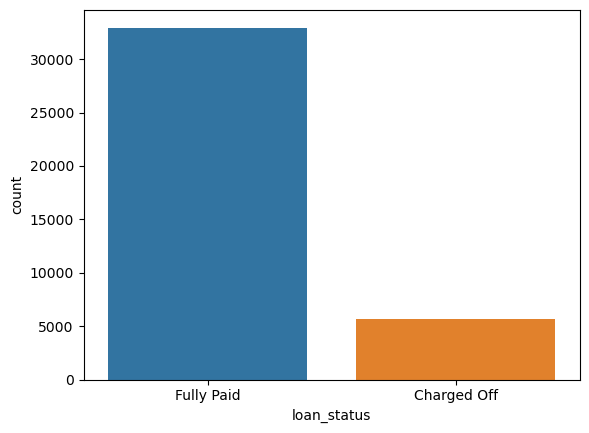

In [272]:
sns.countplot(x ='loan_status', data = loan)

#### Observation : Ration of charged off loan is less compared to fully paid loan

#### Checking loan based on the grade

<Axes: xlabel='grade', ylabel='count'>

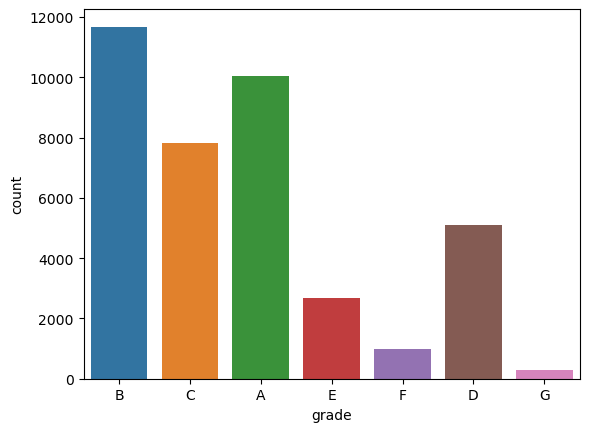

In [273]:
sns.countplot(x ='grade', data = loan)

#### Observation : max loan provided for grade B followed by grade A and C


#### Analyse Loan Amount

<Axes: xlabel='loan_amnt', ylabel='Count'>

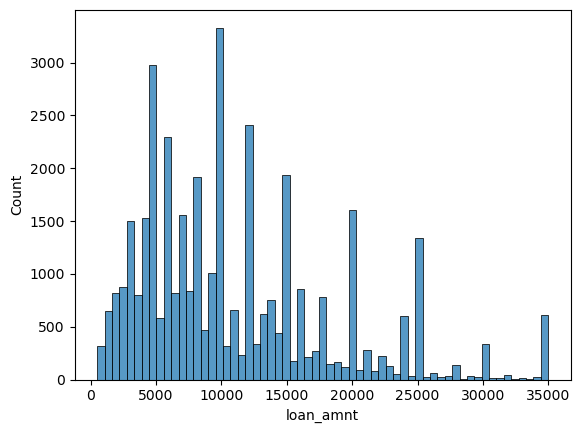

In [274]:
sns.histplot(x='loan_amnt', data = loan)

Observation :
More loan is taken for the amount between 5000 and 15000

#### Analyse on purpose variable

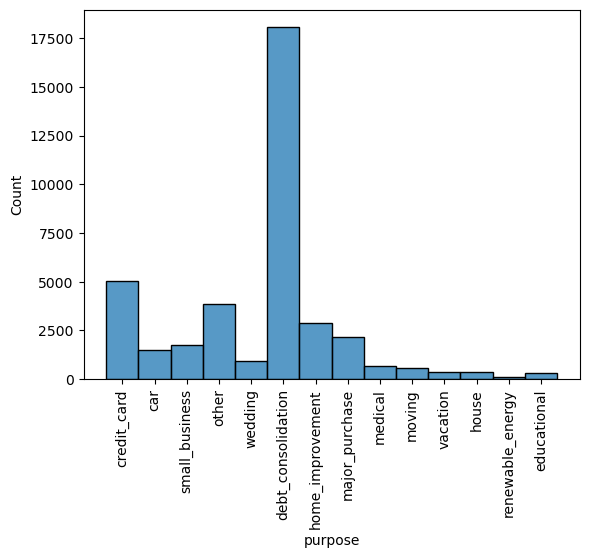

In [275]:
sns.histplot(x='purpose', data = loan)
plt.xticks(rotation = 90)
plt.show()

Observation : Max loan is taken for debt_consolidation

#### Analyse on annual_inc

In [276]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

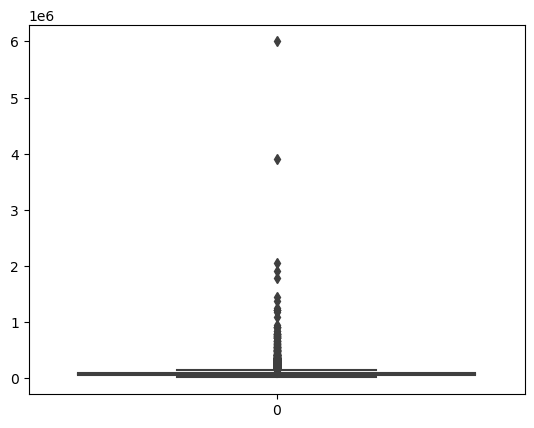

In [277]:
# Check for outliers
sns.boxplot(loan['annual_inc'])
plt.show()

In [278]:
# Calculate Inter Quantile Range
q1,q3 = loan['annual_inc'].quantile([0.25,0.75])
iqr = q3-q1
print("Inter Quantile Range:",iqr)

Inter Quantile Range: 42000.0


In [279]:
# Check for upper and lower bound
lower_bound = q1-(1.5*iqr) 
upper_bound = q3+(1.5*iqr)
print("lower-bound",lower_bound)
print("upper-bound",upper_bound)

lower-bound -23000.0
upper-bound 145000.0


In [283]:
loan.shape

(38577, 17)

In [287]:
#considering only the upper bound as lower bound is negative
loan = loan[~(loan['annual_inc']>upper_bound)]

In [288]:
loan.shape

(36815, 17)

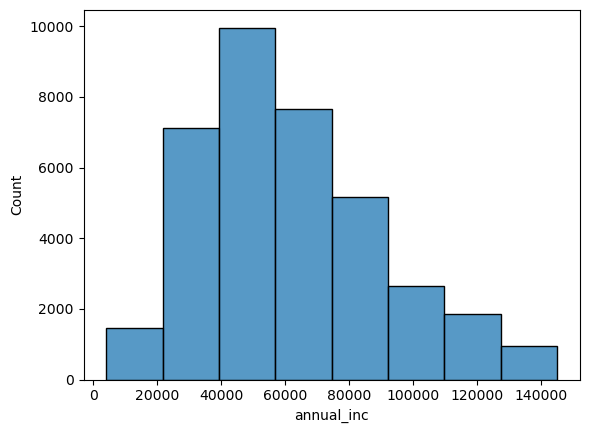

In [291]:
sns.histplot(loan['annual_inc'], bins =8)
plt.show()

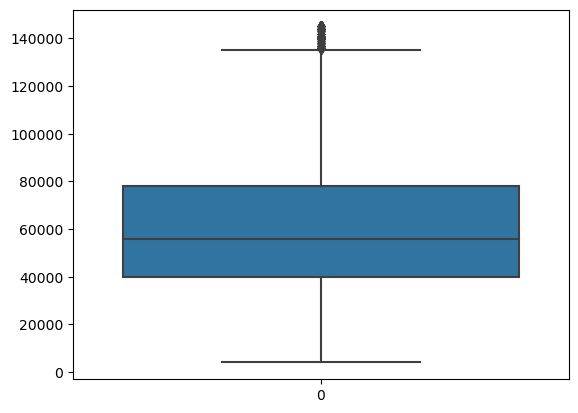

In [292]:
sns.boxplot(loan['annual_inc'])
plt.show()

Observation :<br>
Anual income range from 40000 to 80000

#### Analyse on home_ownership

<Axes: xlabel='home_ownership', ylabel='count'>

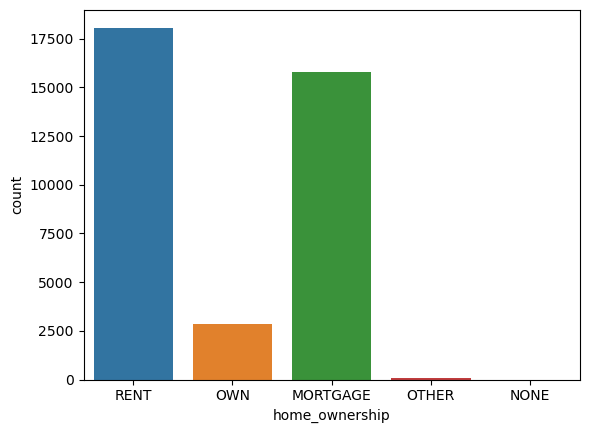

In [293]:
sns.countplot(x ='home_ownership', data = loan)

Observation :
people who is owning the home have taken less loans <br> home_ownership with "RENT" and "MORTAGE" have taken more loan